In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import henon_map_cpp.dynamic_indicators as dyn
from xtrack_engine import xtrack_engine

In [6]:
side_samples = 100

x_extents = [-1.5e-3, 1.5e-3]
y_extents = [-2e-3, 2e-3]

x_samples = np.linspace(x_extents[0], x_extents[1], side_samples)
y_samples = np.linspace(y_extents[0], y_extents[1], side_samples)

# make sample grid
x_grid, y_grid = np.meshgrid(x_samples, y_samples)

# make flattened array grid
x_flat = x_grid.flatten()
y_flat = y_grid.flatten()
px_flat = np.zeros_like(x_flat)
py_flat = np.zeros_like(x_flat)

In [7]:
#engine = xtrack_engine(context="OPENCL", device_id="1.0")
engine = xtrack_engine()


generating ./980d778cee92450ebe2e4c7fd402d679.c
the current directory is '/home/camontan/Insync/carlo.montanari3@studio.unibo.it/OneDrive_Biz/projects/definitive_dyn_indicators'
running build_ext
building '980d778cee92450ebe2e4c7fd402d679' extension
gcc -pthread -B /home/camontan/anaconda3/compiler_compat -Wl,--sysroot=/ -Wsign-compare -DNDEBUG -g -fwrapv -O3 -Wall -Wstrict-prototypes -fPIC -I/home/camontan/anaconda3/include/python3.8 -c 980d778cee92450ebe2e4c7fd402d679.c -o ./980d778cee92450ebe2e4c7fd402d679.o -std=c99 -O3 -Wno-unused-function
gcc -pthread -shared -B /home/camontan/anaconda3/compiler_compat -L/home/camontan/anaconda3/lib -Wl,-rpath=/home/camontan/anaconda3/lib -Wl,--no-as-needed -Wl,--sysroot=/ ./980d778cee92450ebe2e4c7fd402d679.o -o ./980d778cee92450ebe2e4c7fd402d679.cpython-38-x86_64-linux-gnu.so -std=c99 -O3


In [8]:
_, _, _, _, steps = engine.track(x_flat, px_flat, y_flat, py_flat, 1000)

Text(0.5, 1.0, 'Stability time')

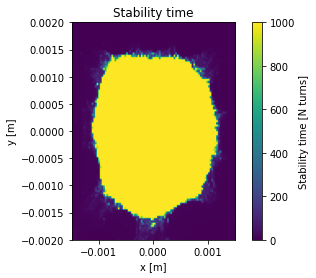

In [11]:
plt.figure()

plt.imshow(steps.reshape(side_samples, side_samples), extent=[
           x_extents[0], x_extents[1], y_extents[0], y_extents[1]], origin='lower')

plt.colorbar(label="Stability time [N turns]")
plt.xlabel('x [m]')
plt.ylabel('y [m]')
plt.title("Stability time")


In [9]:
lyap_data = dyn.fast_lyapunov_indicator(engine, x_flat, px_flat, y_flat, py_flat, 200, 1e-8)

/home/camontan/anaconda3/lib/python3.8/site-packages/numba/np/ufunc/parallel.py:365: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9108. The TBB threading layer is disabled.
  warnings.warn(problem)
OMP: Info #271: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


Text(0.5, 1.0, 'Fast Lyapunov Exponent')

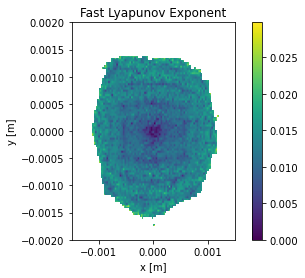

In [12]:
plt.figure()

plt.imshow(lyap_data.reshape(side_samples, side_samples), extent=[
           x_extents[0], x_extents[1], y_extents[0], y_extents[1]], origin='lower')

plt.colorbar()
plt.xlabel('x [m]')
plt.ylabel('y [m]')
plt.title("Fast Lyapunov Exponent")


In [10]:
sali_data = dyn.smallest_alignment_index(engine, x_flat, px_flat, y_flat, py_flat, 200, 10, 1e-8)

100%|██████████| 20/20 [15:10<00:00, 45.52s/it]


Text(0.5, 1.0, 'Smallest Alignment Index')

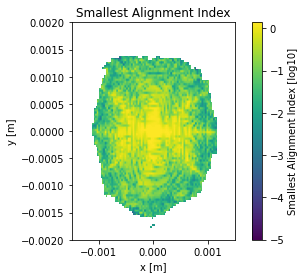

In [13]:
plt.figure()

plt.imshow(np.log10(sali_data).reshape(side_samples, side_samples), extent=[
           x_extents[0], x_extents[1], y_extents[0], y_extents[1]], origin='lower')

plt.colorbar(label="Smallest Alignment Index [log10]")
plt.xlabel('x [m]')
plt.ylabel('y [m]')
plt.title("Smallest Alignment Index")

In [15]:
gali_data = dyn.global_alignment_index(engine, x_flat, px_flat, y_flat, py_flat, 200, 10, 1e-8)

100%|██████████| 20/20 [32:12<00:00, 96.64s/it] 


Text(0.5, 1.0, 'Global Alignment Index')

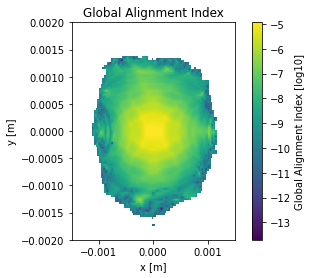

In [16]:
plt.figure()

plt.imshow(np.log10(gali_data).reshape(side_samples, side_samples), extent=[
           x_extents[0], x_extents[1], y_extents[0], y_extents[1]], origin='lower')

plt.colorbar(label="Global Alignment Index [log10]")
plt.xlabel('x [m]')
plt.ylabel('y [m]')
plt.title("Global Alignment Index")